In [29]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(dplyr))
suppressMessages(library(ComplexHeatmap))
suppressMessages(library(mclust))

In [2]:
obj.atac <- readRDS("../data/snATAC.Rds")

In [3]:
obj.atac

An object of class Seurat 
560350 features across 46086 samples within 3 assays 
Active assay: RNA (19204 features, 0 variable features)
 2 other assays present: peaks, GeneActivity
 6 dimensional reductions calculated: scopen, umap, harmony, umap_harmony, umap_harmony_v2, pca

In [19]:
cM <- confusionMatrix(obj.atac$cell_type, obj.atac$predicted.id)
cM <- cM / Matrix::rowSums(cM)

cM <- cM[, c("Adipo", "CM", "Myeloid", "Endo", "Fib", "Pericyte", "Neuronal", "Lymphoid", "vSMCs")]

In [30]:
ari <- as.data.frame(adjustedRandIndex(obj.atac$cell_type, obj.atac$predicted.id))

In [31]:
ari

"adjustedRandIndex(obj.atac$cell_type, obj.atac$predicted.id)"
<dbl>
0.9805804


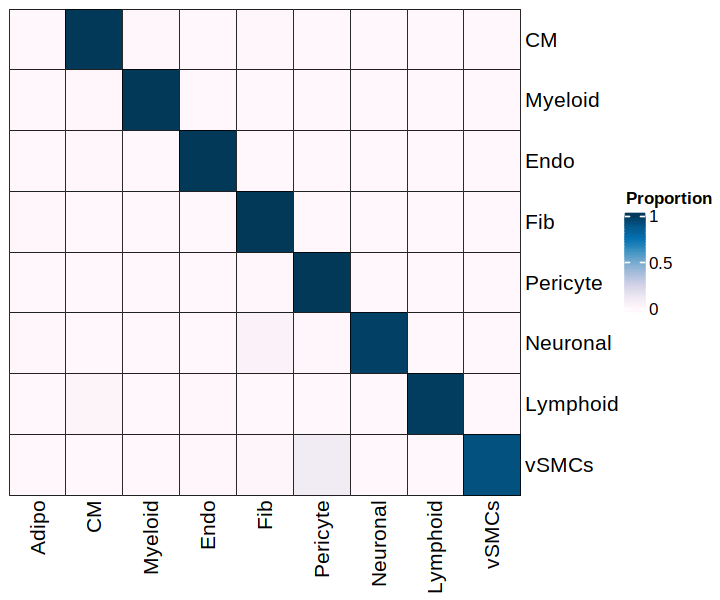

In [28]:
options(repr.plot.height = 5, repr.plot.width = 6)

p <- Heatmap(as.matrix(cM),
             name = "Proportion",
             cluster_columns = FALSE,
             cluster_rows = FALSE,
             clustering_distance_rows = "pearson",
             rect_gp = gpar(col = "black", lwd = 0.5),
            col = paletteContinuous("whiteBlue"))

p